#**Super market sales analysis**
Auther : Md Rafiqul Islam



Date : 10/02/2025

The **Supermarket Sales Dataset** contains transactional data from a supermarket chain with multiple branches. It includes details such as **date and time of purchase, product line, total sales, customer type (member or normal), payment method, customer ratings, and gross income**. This dataset is useful for analyzing sales trends, customer behavior, and business performance across different locations and product categories.



Here’s a brief description of each column in the dataset:

1. **Invoice ID** – A unique identifier for each transaction.
2. **Branch** – The branch of the supermarket (e.g., A, B, or C).
3. **City** – The city where the branch is located.
4. **Customer type** – Indicates whether the customer is a "Member" or "Normal" (non-member).
5. **Gender** – The gender of the customer (Male/Female).
6. **Product line** – The category of the product purchased (e.g., "Health and beauty," "Electronic accessories").
7. **Unit price** – The price per unit of the product.
8. **Quantity** – The number of units purchased in the transaction.
9. **Tax 5%** – The tax amount (5% of the total cost before tax).
10. **Total** – The total cost including tax.
11. **Date** – The date of the transaction.
12. **Time** – The time of the transaction.
13. **Payment** – The payment method used (e.g., "Ewallet," "Credit card," "Cash").
14. **cogs (Cost of Goods Sold)** – The cost of the products before adding tax and profit margin.
15. **gross margin percentage** – The percentage of profit margin applied to the cost.
16. **gross income** – The profit earned from the transaction.
17. **Rating** – A customer rating of the transaction or service (on a scale of 1 to 10).



#**Loading dataset**

we import some libaries for data analysis

*   Numpy - data manipulation
*   matplotlib - data visualization
*   seaborn - data visualization
*   pandas - data manipulation



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('supermarket_sales.csv')

#**Data cleaning and preprocessing**

Here are the five rows of this dataset

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
print("Initial Data Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross 

##**Here is a summery of the dataset**

In [92]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858,3.186857


In [6]:
df.drop_duplicates(inplace=True)

## **Fix Data Types**


In [7]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time  # Convert to time format

##**Convert numerical columns to proper format**


In [8]:
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

##**Standardize Categorical Values**

In [9]:
df['Payment'] = df['Payment'].str.strip().str.capitalize()  # Fix inconsistent capitalization

##**Feature Engineering**


In [10]:
df['Day of Week'] = df['Date'].dt.day_name()  # Extract the day of the week
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour  # Extract hour from time

In [11]:
# Display cleaned data
print("\nCleaned Data Sample:")
df.head()


Cleaned Data Sample:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day of Week,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,10


#Here are 10 insightful questions that can help in decision-making using this dataset:

1. **Which product line generates the highest revenue?**\
   → Helps in identifying the most profitable product category for strategic focus.

2. **What is the most common payment method?**\
   → Aids in optimizing payment options and enhancing customer convenience.

3. **Which branch has the highest total sales?**\
   → Assists in resource allocation and expansion planning.

4. **Do members spend more than normal customers?**\
   → Helps in evaluating the effectiveness of the membership program.

5. **How does customer rating vary across different product lines?**\
   → Identifies areas needing service or product improvements.

6. **At what time of the day do sales peak?**\
   → Supports workforce scheduling and promotional planning.

7. **Is there a correlation between total sales and customer rating?**\
   → Helps understand if customer satisfaction impacts revenue.

8. **Which city has the highest average spending per customer?**\
   → Guides location-based marketing and inventory decisions.

9. **How does gross income vary across different days of the week?**\
   → Helps in planning discounts, promotions, and operational efficiency.

10. **What is the impact of unit price on the quantity purchased?**\
    → Assists in pricing strategies to maximize sales.


##1. **Which product line generates the highest revenue?**\
   → Helps in identifying the most profitable product category for strategic focus.



In [25]:
highest_revenue_product = df.groupby('Product line')['Total'].sum().idxmax()
highest_revenue_product

'Food and beverages'

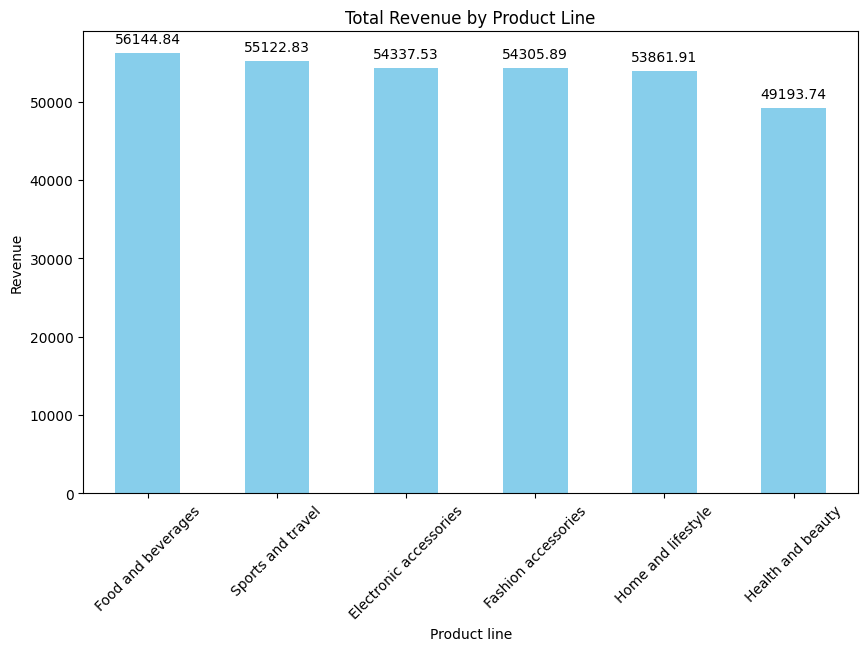

In [86]:
plt.figure(figsize=(10,6))
ax=df.groupby('Product line')['Total'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()/1),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Total Revenue by Product Line")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

##2. **What is the most common payment method?**\
   → Aids in optimizing payment options and enhancing customer convenience.



In [28]:
common_payment_method = df['Payment'].mode()[0]
common_payment_method

'Ewallet'

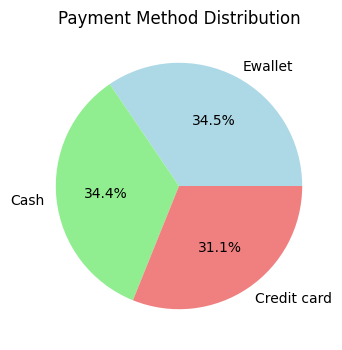

In [29]:
plt.figure(figsize=(6,4))
df['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title("Payment Method Distribution")
plt.ylabel('')
plt.show()

##3. **Which branch has the highest total sales?**\
   → Assists in resource allocation and expansion planning.


In [30]:
highest_sales_branch = df.groupby('Branch')['Total'].sum().idxmax()
highest_sales_branch

'C'

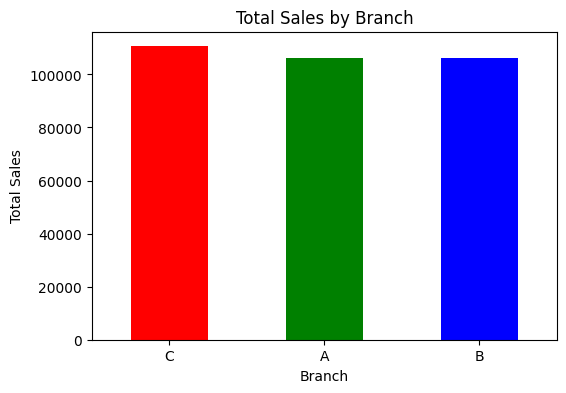

In [32]:
plt.figure(figsize=(6,4))
df.groupby('Branch')['Total'].sum().sort_values(ascending=False).plot(kind='bar', color=['red', 'green', 'blue'])
plt.title("Total Sales by Branch")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()

##4. **Do members spend more than normal customers?**\
   → Helps in evaluating the effectiveness of the membership program.



In [33]:
members_avg_spending = df[df['Customer type'] == 'Member']['Total'].mean()
normal_avg_spending = df[df['Customer type'] == 'Normal']['Total'].mean()
print(f"Members' Avg Spending: {members_avg_spending}")
print(f"Normal Customers' Avg Spending: {normal_avg_spending}")

Members' Avg Spending: 327.7913053892216
Normal Customers' Avg Spending: 318.12285571142286


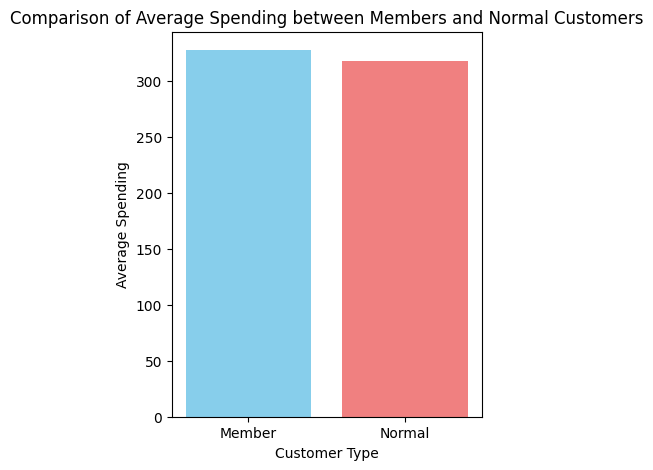

In [88]:
plt.figure(figsize=(4, 5))
plt.bar(['Member', 'Normal'], [members_avg_spending, normal_avg_spending], color=['skyblue', 'lightcoral'])
plt.xlabel('Customer Type')
plt.ylabel('Average Spending')
plt.title('Comparison of Average Spending between Members and Normal Customers')
plt.show()


##5. **How does customer rating vary across different product lines?**\
   → Identifies areas needing service or product improvements.


In [35]:
rating_by_product = df.groupby('Product line')['Rating'].mean()
rating_by_product

,Rating
Product line,
Electronic accessories,6.924706
Fashion accessories,7.029213
Food and beverages,7.113218
Health and beauty,7.003289
Home and lifestyle,6.837500
Sports and travel,6.916265


<ipython-input-81-67724e43ed67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Product line', data=df ,order=df['Product line'].value_counts().index, palette='viridis')


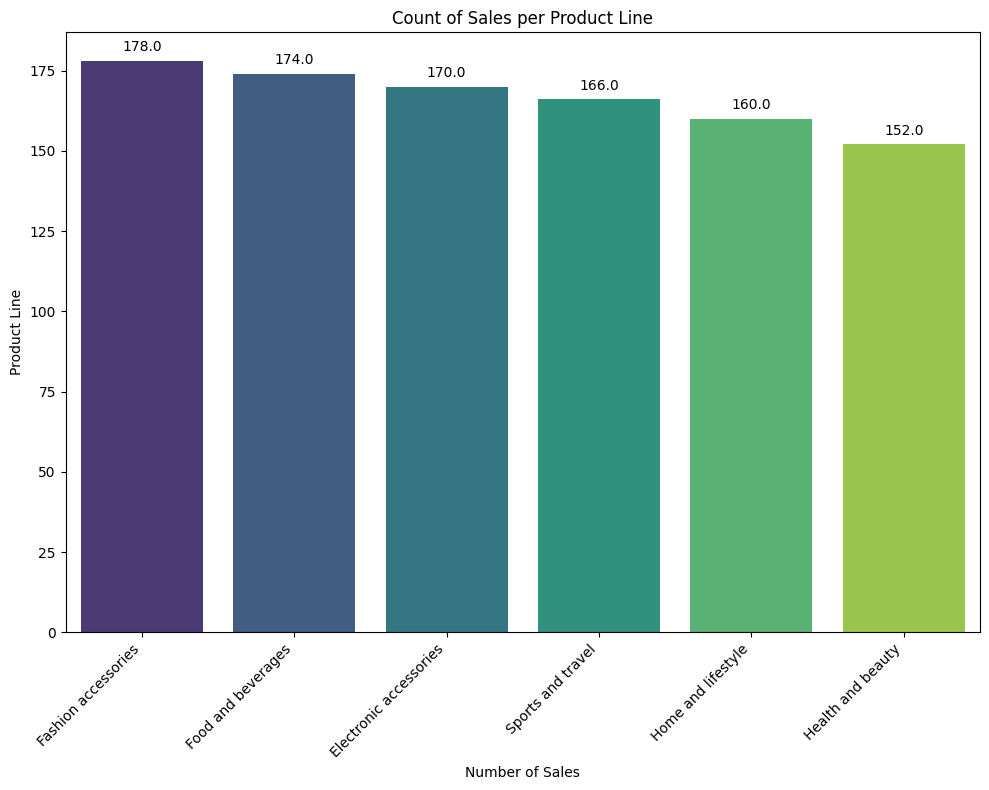

In [81]:


plt.figure(figsize=(10, 8))
ax=sns.countplot(x='Product line', data=df ,order=df['Product line'].value_counts().index, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()/1),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Count of Sales per Product Line')
plt.ylabel('Product Line')
plt.xlabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##6. **At what time of the day do sales peak?**\
   → Supports workforce scheduling and promotional planning.



In [18]:

peak_hour = df.groupby('Hour')['Total'].sum().idxmax()


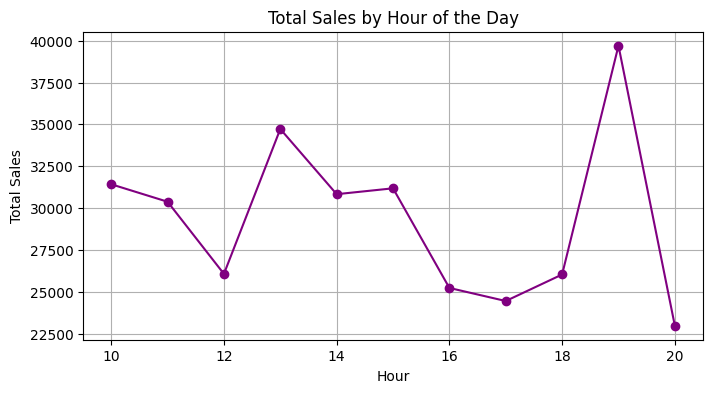

In [53]:
plt.figure(figsize=(8,4))
df.groupby('Hour')['Total'].sum().plot(kind='line', marker='o', color='purple')
plt.title("Total Sales by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

##7. **Is there a correlation between total sales and customer rating?**\
   → Helps understand if customer satisfaction impacts revenue.


In [54]:
correlation = df[['Total', 'Rating']].corr().iloc[0, 1]
correlation

-0.03644170499701849

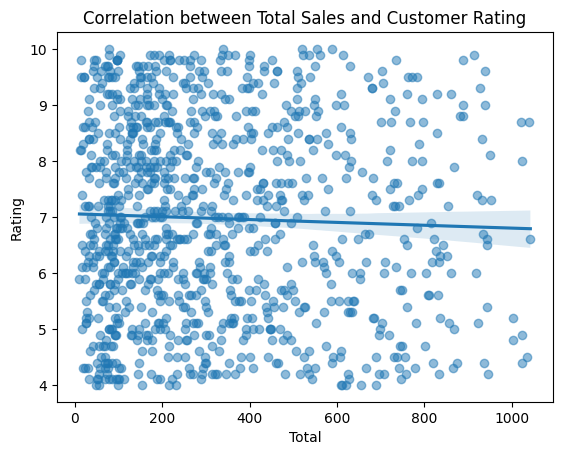

In [91]:
sns.regplot(x='Total', y='Rating', data=df, scatter_kws={'alpha':0.5})
plt.title("Correlation between Total Sales and Customer Rating")
plt.show()

So there is **no Correlation** between sale and rating


##8. **Which city has the highest average spending per customer?**\
   → Guides location-based marketing and inventory decisions.



In [20]:
highest_avg_spending_city = df.groupby('City')['Total'].mean().idxmax()
highest_avg_spending_city

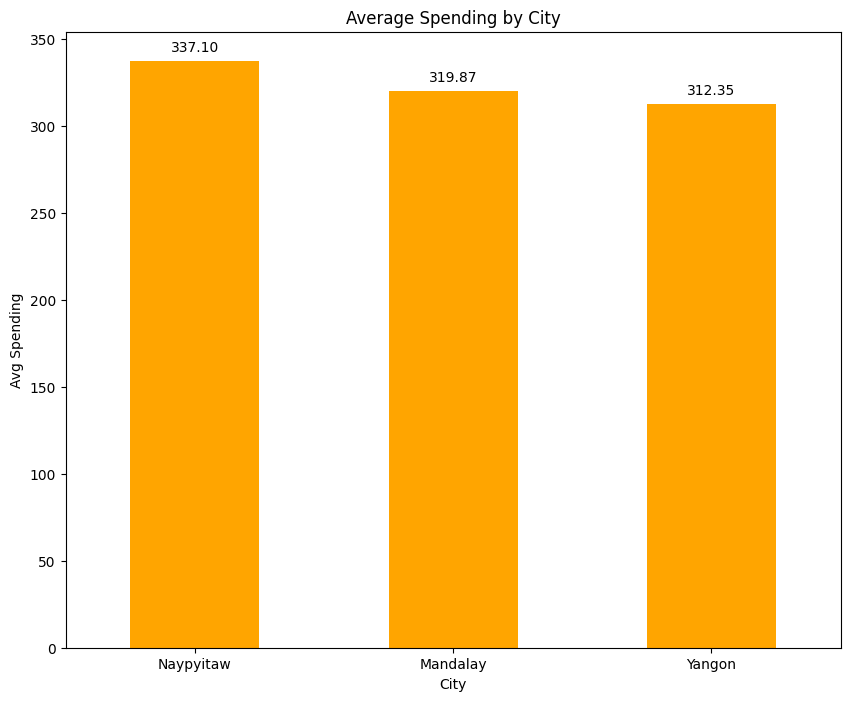

In [71]:
plt.figure(figsize=(10,8))
ax= df.groupby('City')['Total'].mean().sort_values(ascending=False).plot(kind='bar',color='orange')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()/1),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Average Spending by City")
plt.ylabel("Avg Spending")
plt.xticks(rotation=0)
plt.show()

##9. **How does gross income vary across different days of the week?**\
   → Helps in planning discounts, promotions, and operational efficiency.



In [66]:
gross_income_by_day = df.groupby('Day of Week')['gross income'].sum()
gross_income_by_day

,gross income
Day of Week,
Friday,2091.7305
Monday,1804.7180
Saturday,2672.4195
Sunday,2117.0425
Thursday,2159.4880
Tuesday,2451.5355
Wednesday,2082.4350


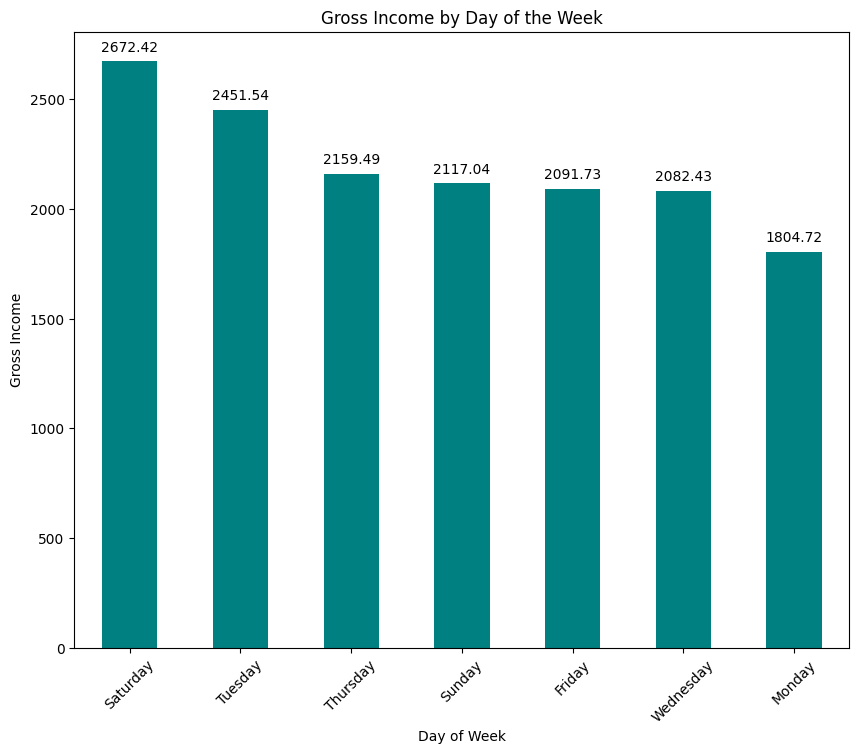

In [72]:
plt.figure(figsize=(10,8))
ax=df.groupby('Day of Week')['gross income'].sum().sort_values(ascending=False).plot(kind='bar', color='teal')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()/1),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Gross Income by Day of the Week")
plt.ylabel("Gross Income")
plt.xticks(rotation=45)
plt.show()

##10. **What is the impact of unit price on the quantity purchased?**\
##    → Assists in pricing strategies to maximize sales.

In [73]:
price_quantity_corr = df[['Unit price', 'Quantity']].corr().iloc[0, 1]
price_quantity_corr

0.010777564342497253

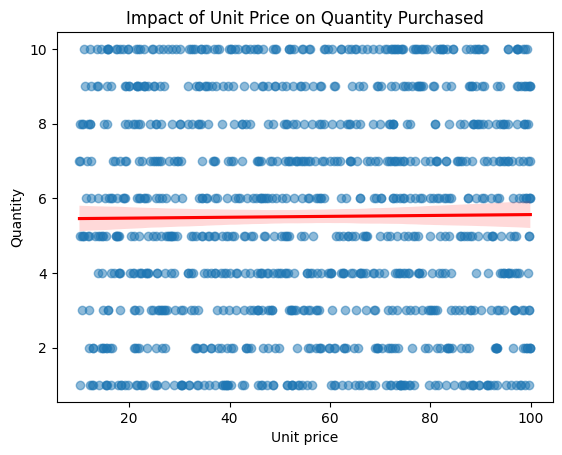

In [74]:
sns.regplot(x='Unit price', y='Quantity', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Impact of Unit Price on Quantity Purchased")
plt.show()

No impact of Unit price in Quantity Purrchesd

###**Sales in the different cities**

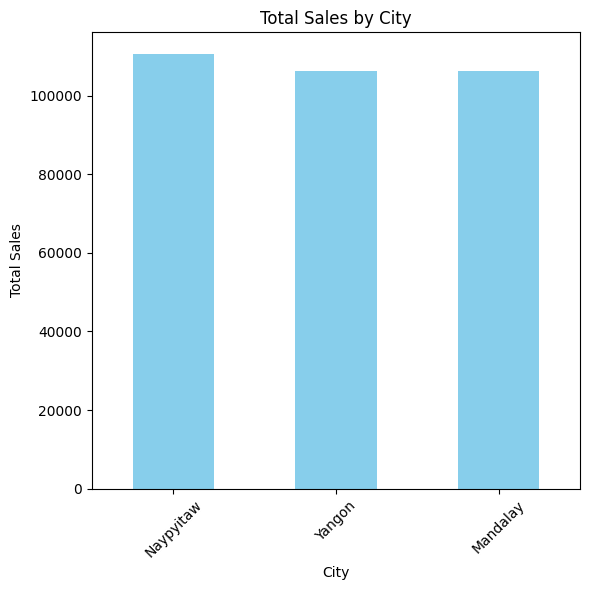

In [87]:

sales_by_city = df.groupby('City')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 6))
sales_by_city.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
print(f"1. Highest Revenue Product Line: {highest_revenue_product}")
print(f"2. Most Common Payment Method: {common_payment_method}")
print(f"3. Highest Sales Branch: {highest_sales_branch}")
print(f"4. Members' Avg Spending: {members_avg_spending}, Normal Customers' Avg Spending: {normal_avg_spending}")
print(f"5. Rating by Product Line:\n{rating_by_product}")
print(f"6. Peak Sales Hour: {peak_hour}")
print(f"7. Correlation between Total Sales and Rating: {correlation}")
print(f"8. Highest Avg Spending City: {highest_avg_spending_city}")
print(f"9. Gross Income by Day:\n{gross_income_by_day}")
print(f"10. Correlation between Unit Price and Quantity: {price_quantity_corr}")

1. Highest Revenue Product Line: Food and beverages
2. Most Common Payment Method: Ewallet
3. Highest Sales Branch: C
4. Members' Avg Spending: 327.7913053892216, Normal Customers' Avg Spending: 318.12285571142286
5. Rating by Product Line:
Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64
6. Peak Sales Hour: 19
7. Correlation between Total Sales and Rating: -0.03644170499701849
8. Highest Avg Spending City: Naypyitaw
9. Gross Income by Day:
Day of Week
Friday       2091.7305
Monday       1804.7180
Saturday     2672.4195
Sunday       2117.0425
Thursday     2159.4880
Tuesday      2451.5355
Wednesday    2082.4350
Name: gross income, dtype: float64
10. Correlation between Unit Price and Quantity: 0.010777564342497253
